In [1]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import statistics

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.ticker as ticker
import seaborn as sns

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("datos/train.csv")
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,0.30,Premium,D,SI2,62.4,58.0,4.31,4.28,2.68,6.353
1,1,1.01,Ideal,E,VVS2,62.7,56.0,6.42,6.46,4.04,9.183
2,2,0.72,Ideal,F,VS2,61.8,59.0,5.71,5.74,3.54,7.983
3,3,1.08,Very Good,G,SI2,63.2,57.0,6.54,6.50,4.12,8.371
4,4,0.36,Premium,G,VS1,62.3,59.0,4.50,4.55,2.82,6.588


In [3]:
df.set_index('id', inplace=True)
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
id,,,,,,,,,,
0,0.30,Premium,D,SI2,62.4,58.0,4.31,4.28,2.68,6.353
1,1.01,Ideal,E,VVS2,62.7,56.0,6.42,6.46,4.04,9.183
2,0.72,Ideal,F,VS2,61.8,59.0,5.71,5.74,3.54,7.983
3,1.08,Very Good,G,SI2,63.2,57.0,6.54,6.50,4.12,8.371
4,0.36,Premium,G,VS1,62.3,59.0,4.50,4.55,2.82,6.588


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40455 entries, 0 to 40454
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    40455 non-null  float64
 1   cut      40455 non-null  object 
 2   color    40455 non-null  object 
 3   clarity  40455 non-null  object 
 4   depth    40455 non-null  float64
 5   table    40455 non-null  float64
 6   x        40455 non-null  float64
 7   y        40455 non-null  float64
 8   z        40455 non-null  float64
 9   price    40455 non-null  float64
dtypes: float64(7), object(3)
memory usage: 3.4+ MB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,40455.0,0.797576,0.475939,0.200,0.400,0.70,1.040,5.010
depth,40455.0,61.746377,1.436796,43.000,61.000,61.80,62.500,79.000
table,40455.0,57.451694,2.234569,44.000,56.000,57.00,59.000,95.000
x,40455.0,5.729163,1.125244,0.000,4.710,5.69,6.540,10.740
y,40455.0,5.732896,1.154799,0.000,4.720,5.70,6.540,58.900
z,40455.0,3.537351,0.711002,0.000,2.910,3.52,4.030,31.800
price,40455.0,7.783822,1.016828,5.787,6.851,7.78,8.581,9.842


In [6]:
df.describe(include=object).T

,count,unique,top,freq
cut,40455,5,Ideal,16230
color,40455,7,G,8410
clarity,40455,8,SI1,9779


In [7]:
df.duplicated().sum()

85

In [8]:
df.duplicated()

id
0        False
1        False
2        False
3        False
4        False
         ...  
40450    False
40451    False
40452    False
40453    False
40454    False
Length: 40455, dtype: bool

In [10]:
duplicados = df[df.duplicated()]
duplicados

,carat,cut,color,clarity,depth,table,x,y,z,price
id,,,,,,,,,,
2746,0.43,Ideal,G,VS1,61.9,55.0,4.84,4.86,3.00,6.849
7158,0.35,Premium,J,VS1,62.4,58.0,5.67,5.64,3.53,6.855
7672,0.41,Ideal,G,IF,61.7,56.0,4.77,4.80,2.95,7.220
8184,1.00,Fair,F,SI2,65.1,55.0,6.26,6.23,4.07,8.091
9493,2.00,Premium,G,SI2,60.7,60.0,8.13,8.07,4.92,9.290
...,...,...,...,...,...,...,...,...,...,...
39243,0.53,Premium,E,SI2,62.2,57.0,5.20,5.16,3.22,6.892
39283,2.05,Premium,G,SI1,61.6,59.0,8.20,8.16,5.04,9.635
39955,0.52,Ideal,D,VS2,61.8,55.0,5.19,5.16,3.20,7.560


In [11]:
duplicados.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,85.0,0.843765,0.648491,0.300,0.33,0.52,1.100,3.010
depth,85.0,62.370588,1.607114,57.200,61.70,62.20,63.000,67.000
table,85.0,56.847059,1.948784,53.000,55.00,57.00,58.000,62.000
x,85.0,5.663765,1.493593,0.000,4.46,5.20,6.750,8.990
y,85.0,5.637647,1.473098,0.000,4.44,5.19,6.700,8.940
z,85.0,3.525529,0.943510,0.000,2.76,3.20,4.140,5.900
price,85.0,7.650082,1.062637,6.109,6.76,7.22,8.514,9.811


In [12]:
duplicados.describe(include=object).T

,count,unique,top,freq
cut,85,5,Ideal,34
color,85,7,G,21
clarity,85,7,SI2,25


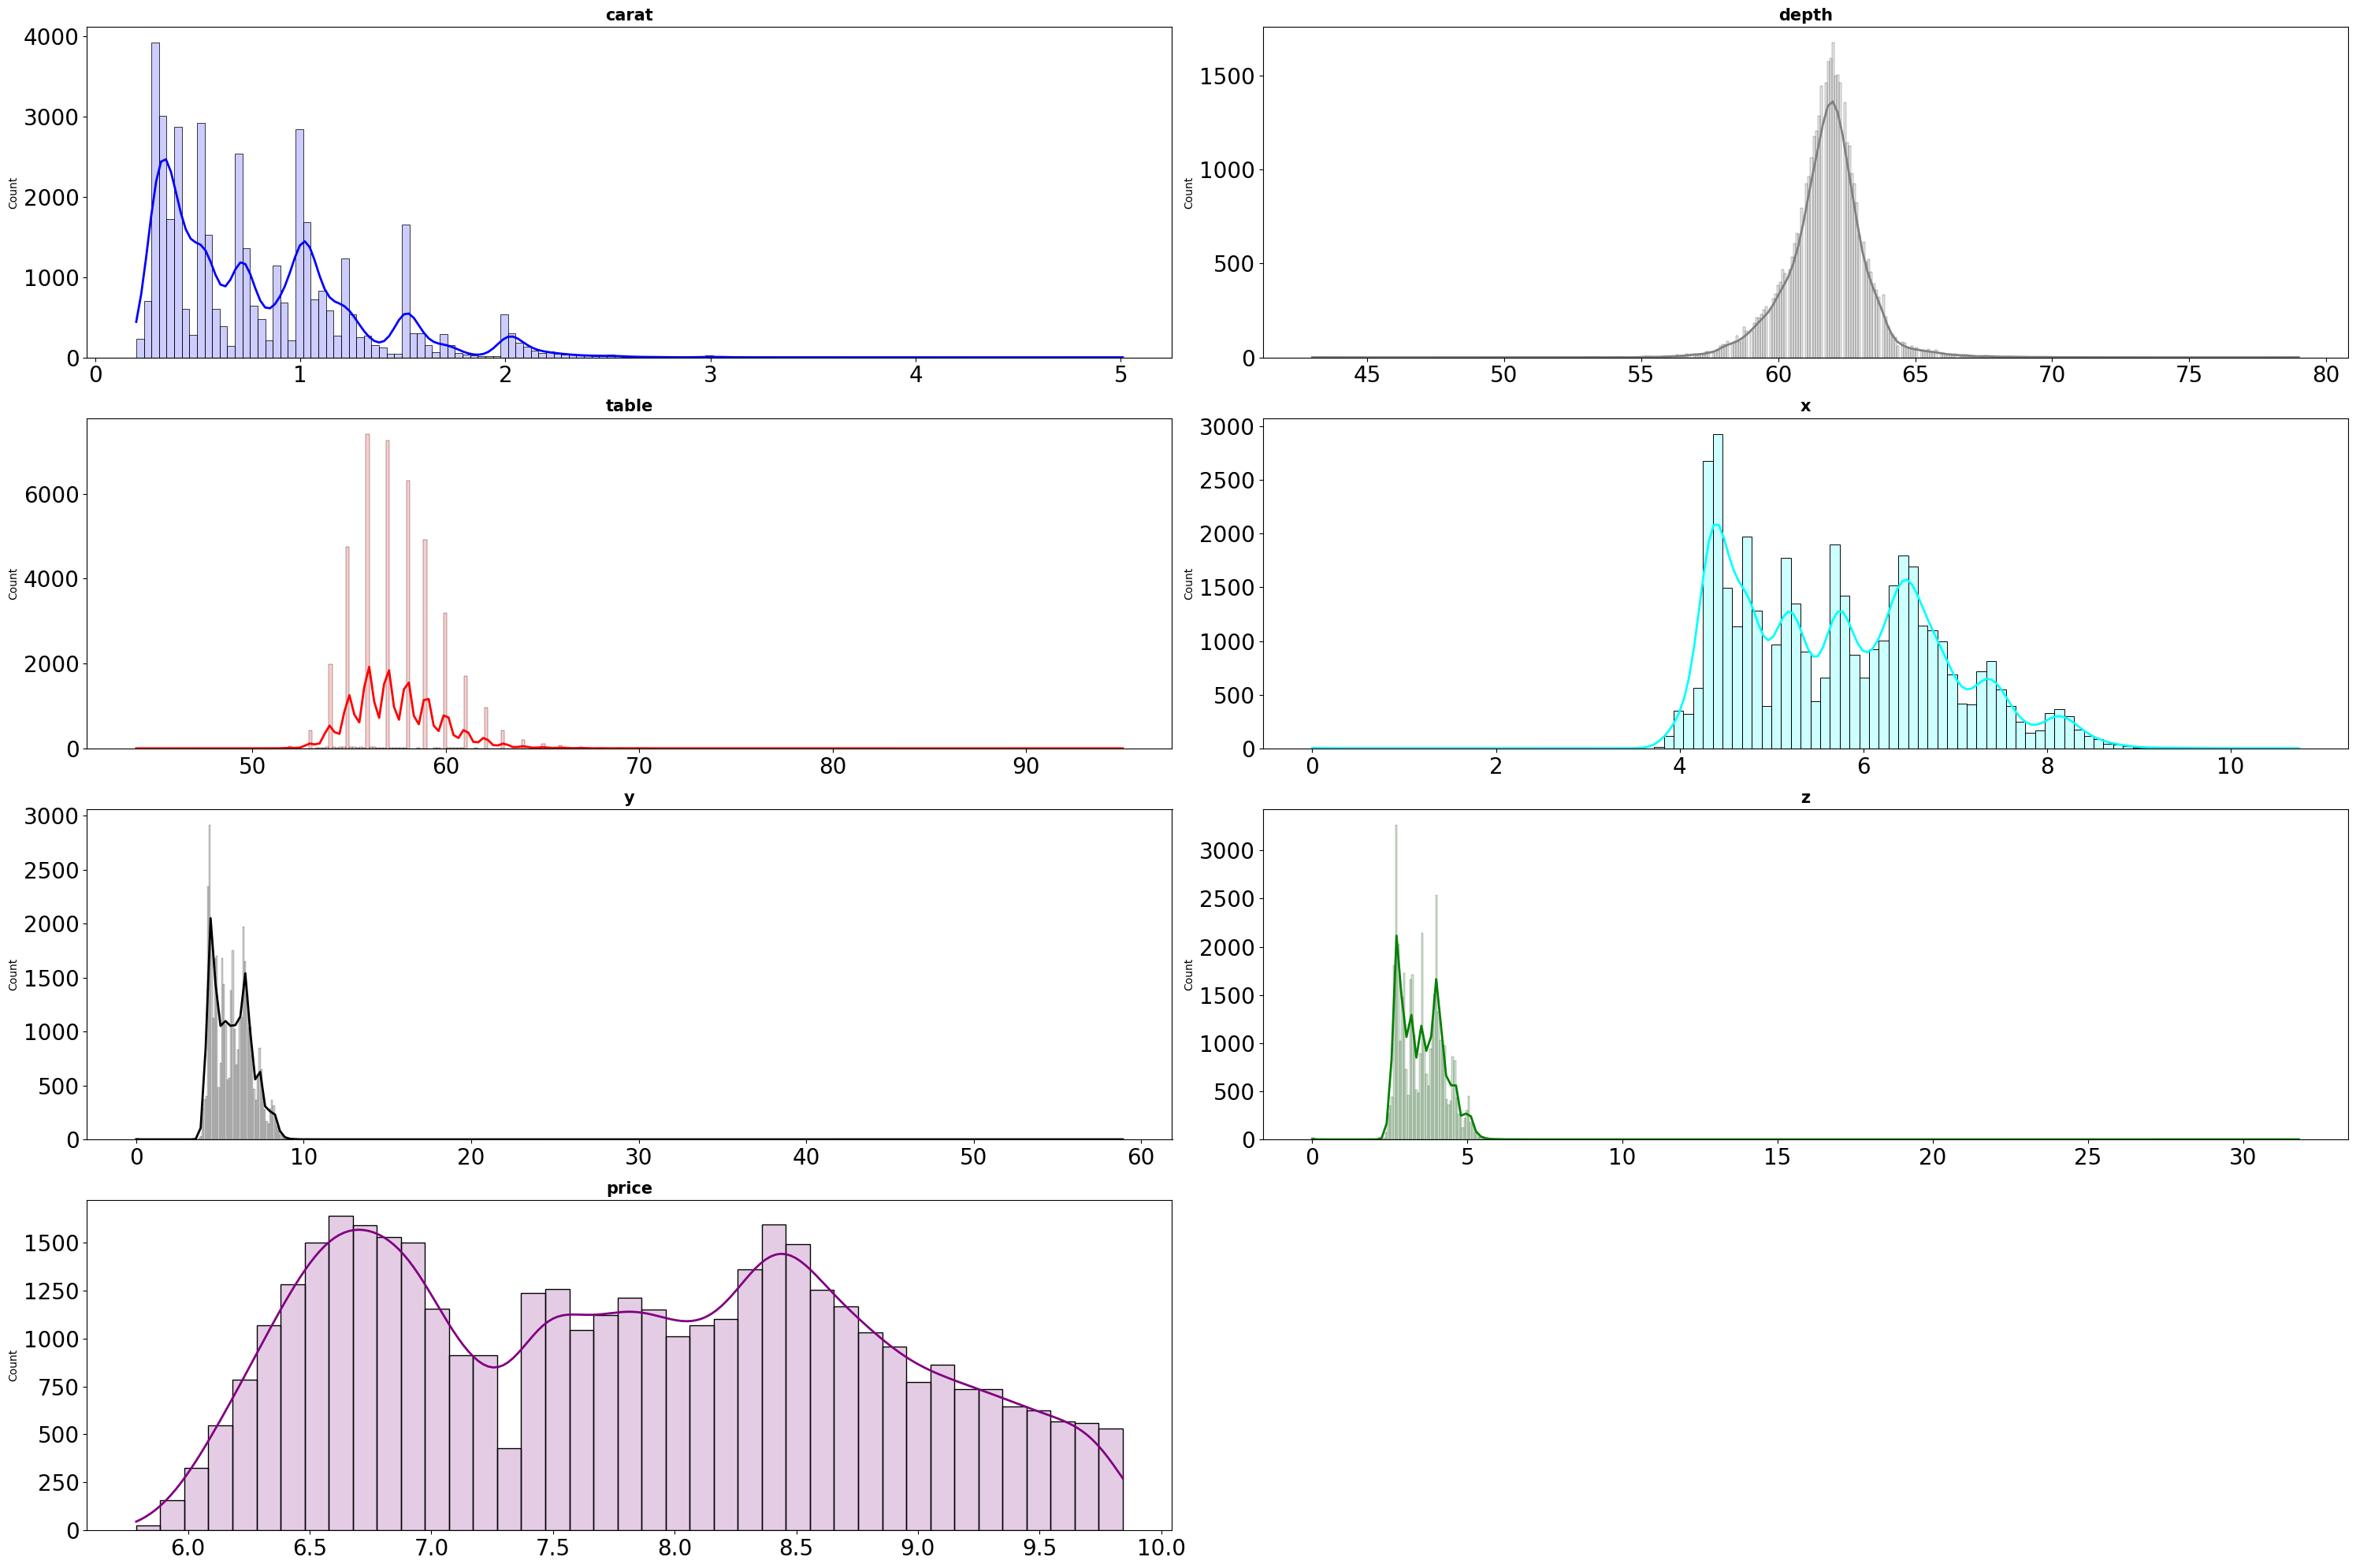

In [15]:
fig, axes = plt.subplots(nrows = 4, ncols = 2, figsize = (30, 20))

lista_colores = ["blue", "gray", "red", "cyan","black","green","purple"]

axes = axes.flat

columnas_numeric = df.select_dtypes(include = np.number).columns

for i, colum in enumerate(columnas_numeric): 
    sns.histplot(
        data = df,
        x = colum,
        kde = True, 
        color = lista_colores[i], 
        line_kws = {"linewidth": 2}, 
        alpha = 0.2, 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    
fig.delaxes(axes[-1])
fig.tight_layout();


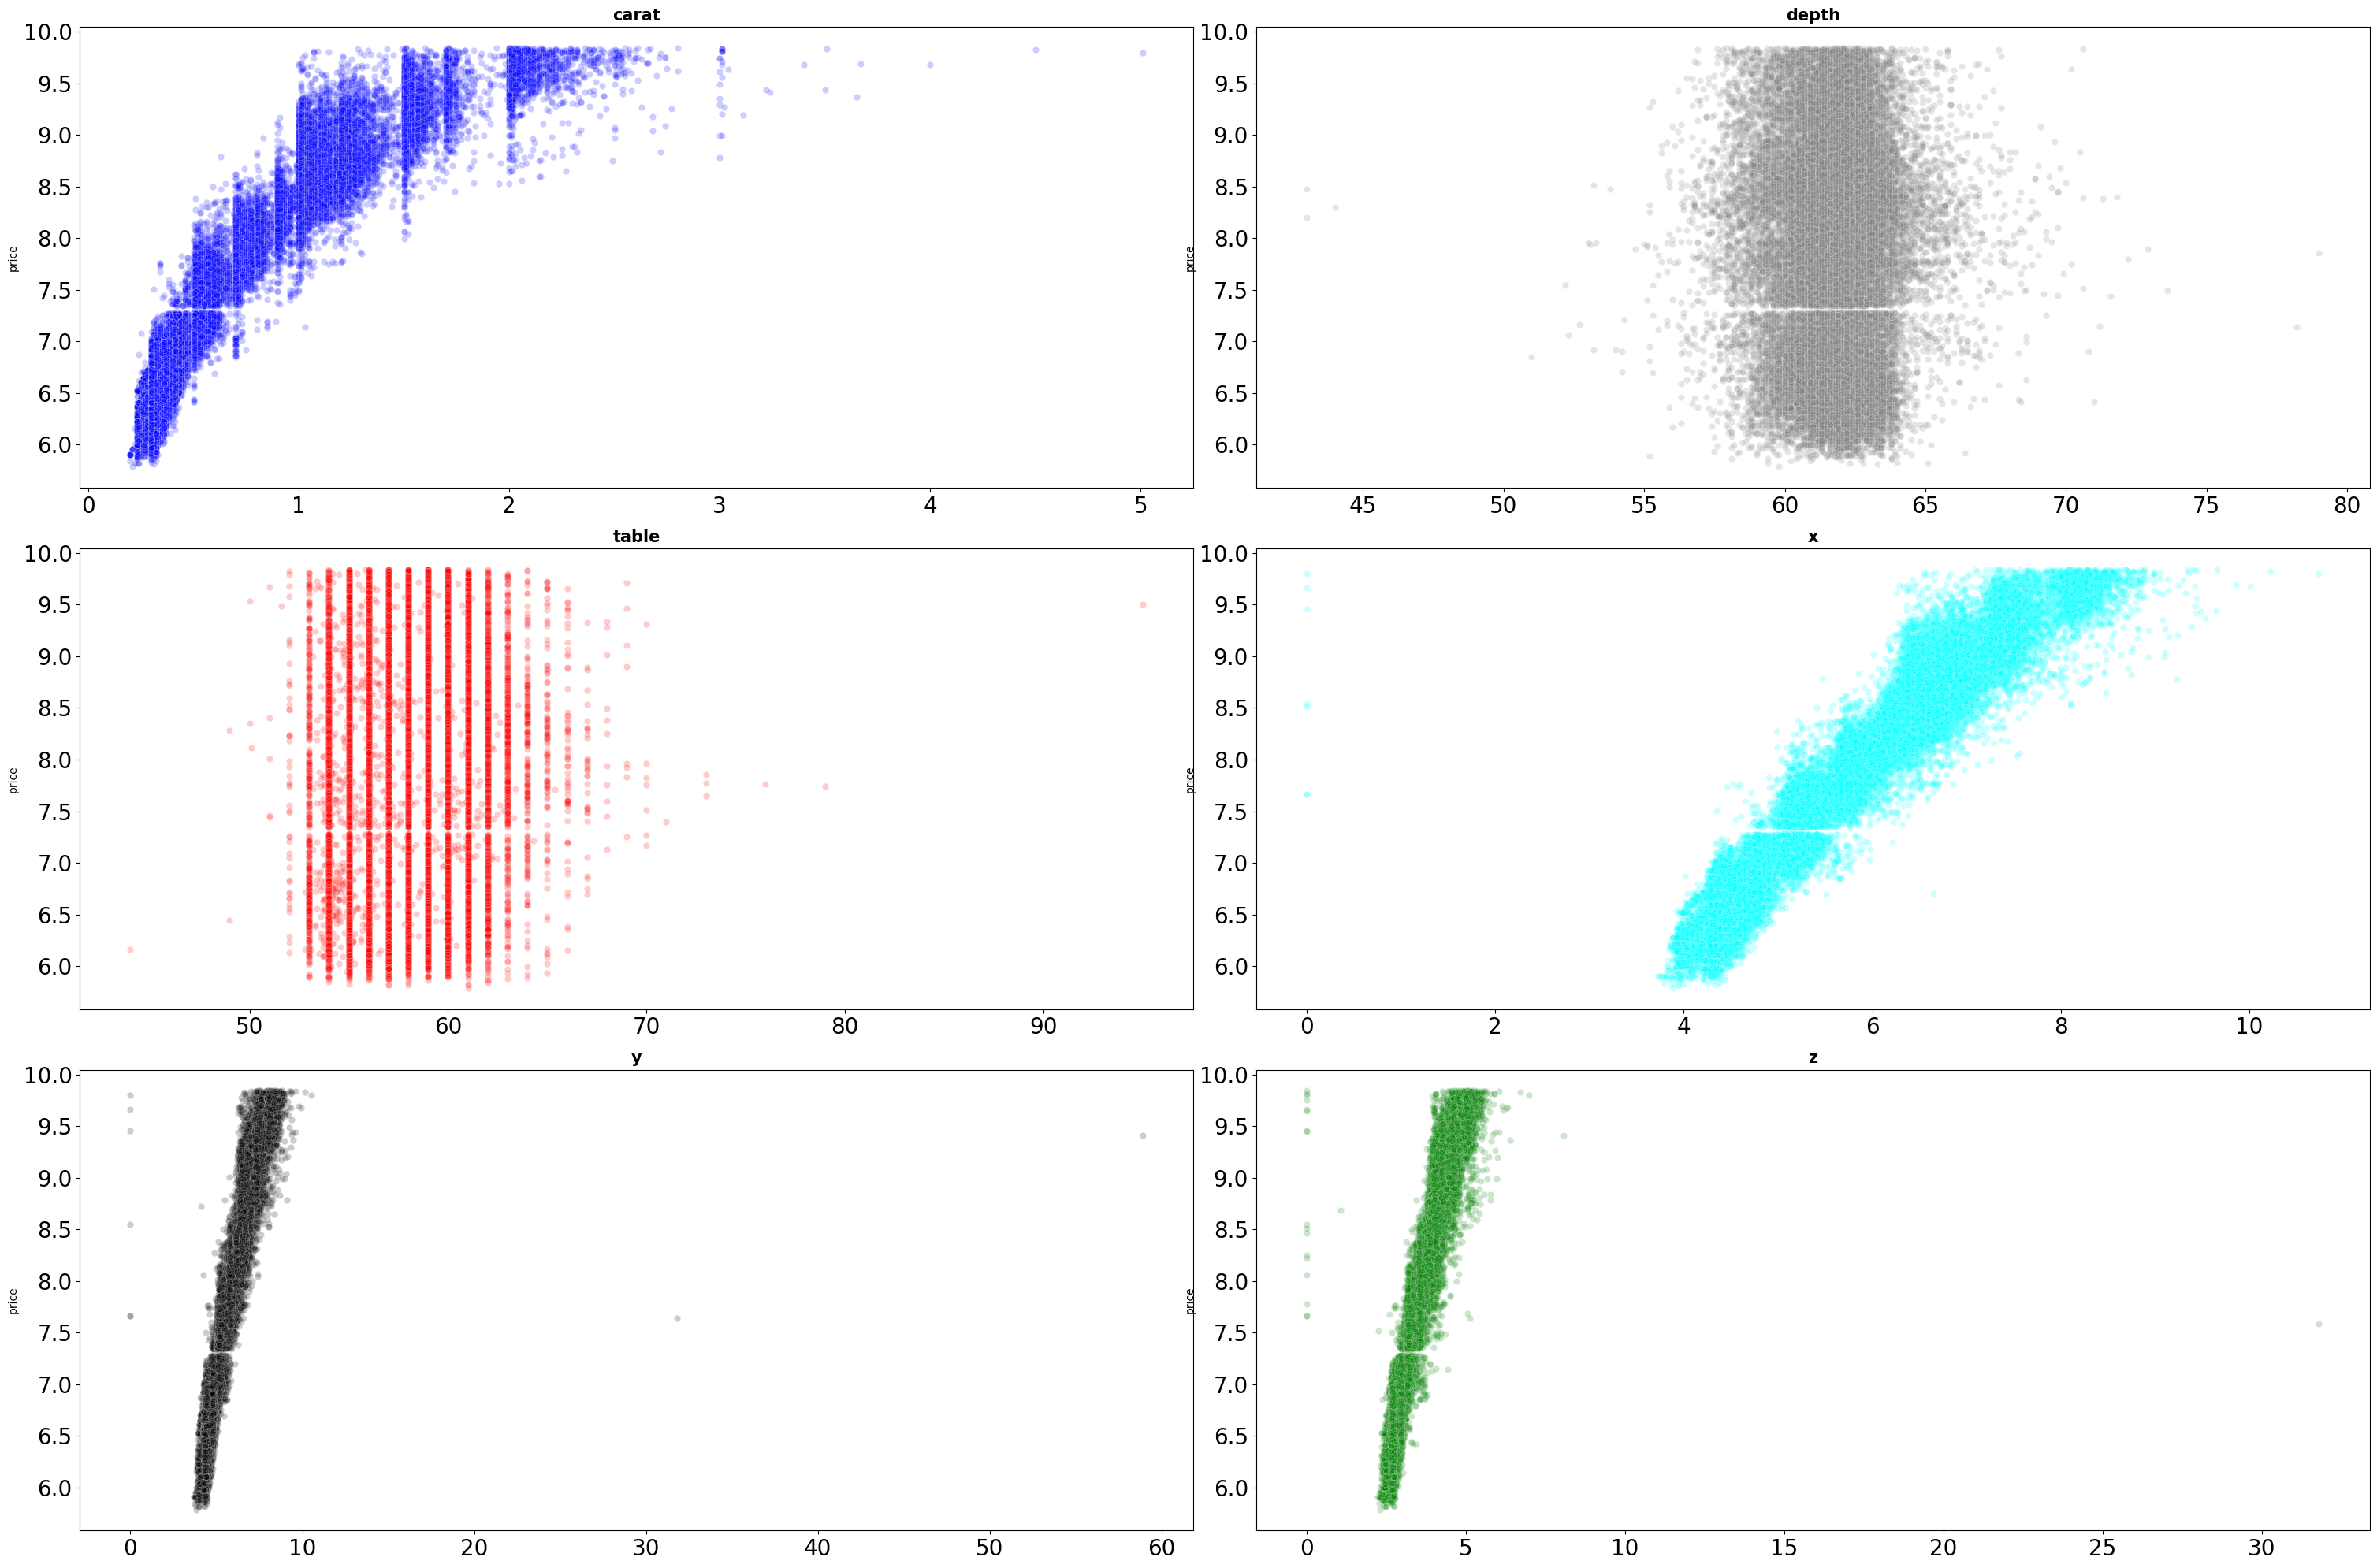

In [19]:
fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (30, 20))

lista_colores = ["blue", "gray", "red", "cyan","black","green","purple"]

axes = axes.flat

columnas_numeric = df.select_dtypes(include = np.number).drop("price", axis=1)

for i, colum in enumerate(columnas_numeric): 
    sns.scatterplot(
        data = df,
        x = colum,
        y = "price",
        color = lista_colores[i], 
        alpha = 0.2, 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    
fig.tight_layout();

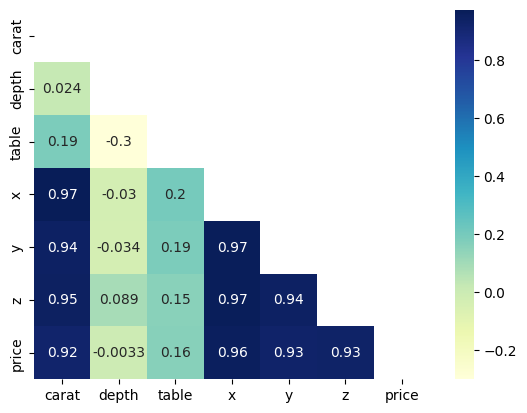

In [20]:
mask = np.triu(np.ones_like(df.corr(), dtype = np.bool))
sns.heatmap(df.corr(), 
           cmap = "YlGnBu", 
            mask = mask,
           annot = True);

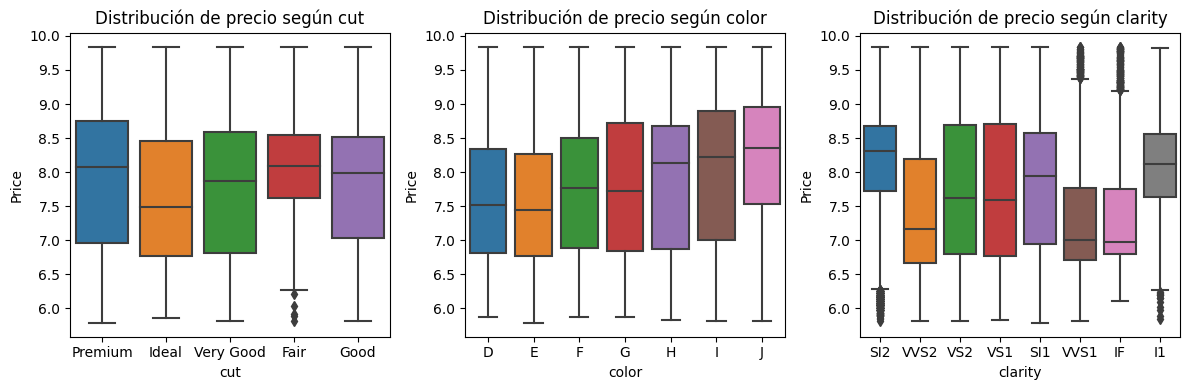

In [21]:
categories = ["cut", "color", "clarity"]

fig, axes = plt.subplots(1, 3, figsize=(12, 4))

for i, category in enumerate(categories):
    sns.boxplot(x=category, y="price", data=df, ax=axes[i])
    axes[i].set_title("Distribución de precio según {}".format(category))
    axes[i].set_xlabel(category)
    axes[i].set_ylabel("Price")

# Ajustar los subplots
plt.tight_layout()

# Mostrar el gráfico
plt.show()

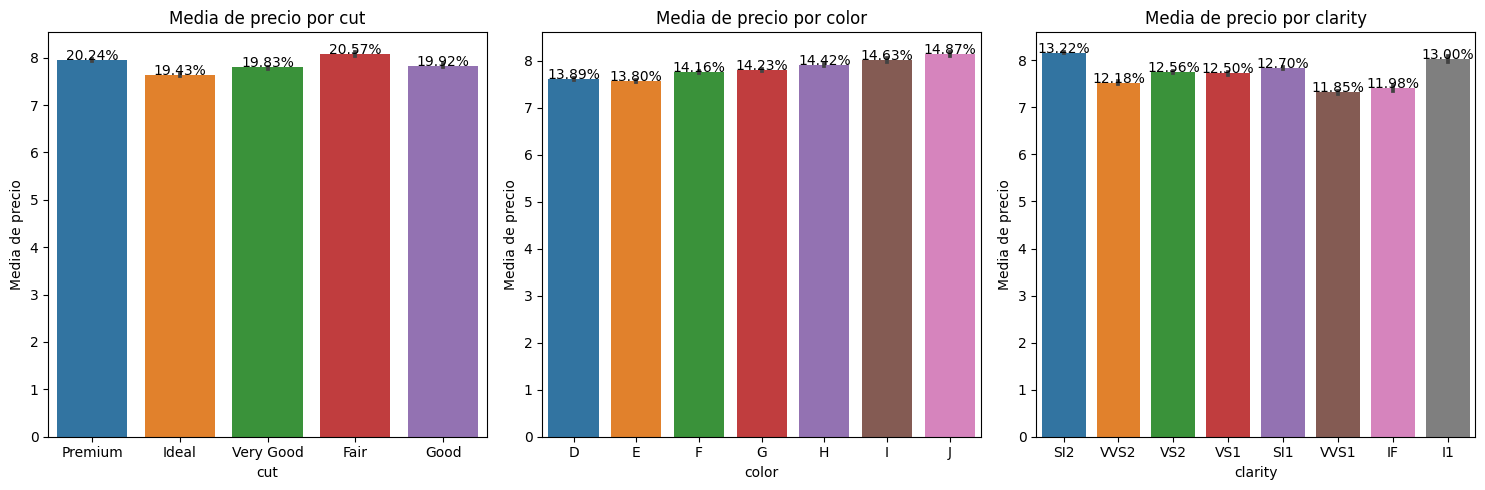

In [24]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
axes=axes.flat
columnas_object = df.select_dtypes(include = "object").columns

for i, col in enumerate(columnas_object):
    df_col_price = df.groupby(col)['price'].mean().reset_index()
    chart=sns.barplot(data=df, x=col, y='price', ax=axes[i])
    axes[i].set_title(f'Media de precio por {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Media de precio')
    total=df_col_price['price'].sum()
    for p in chart.patches:
        height = p.get_height()
        chart.text(p.get_x() + p.get_width() / 2., height,
                '{:.2f}%'.format(height/total*100),
                ha='center', fontsize=10)

plt.tight_layout()
plt.show()

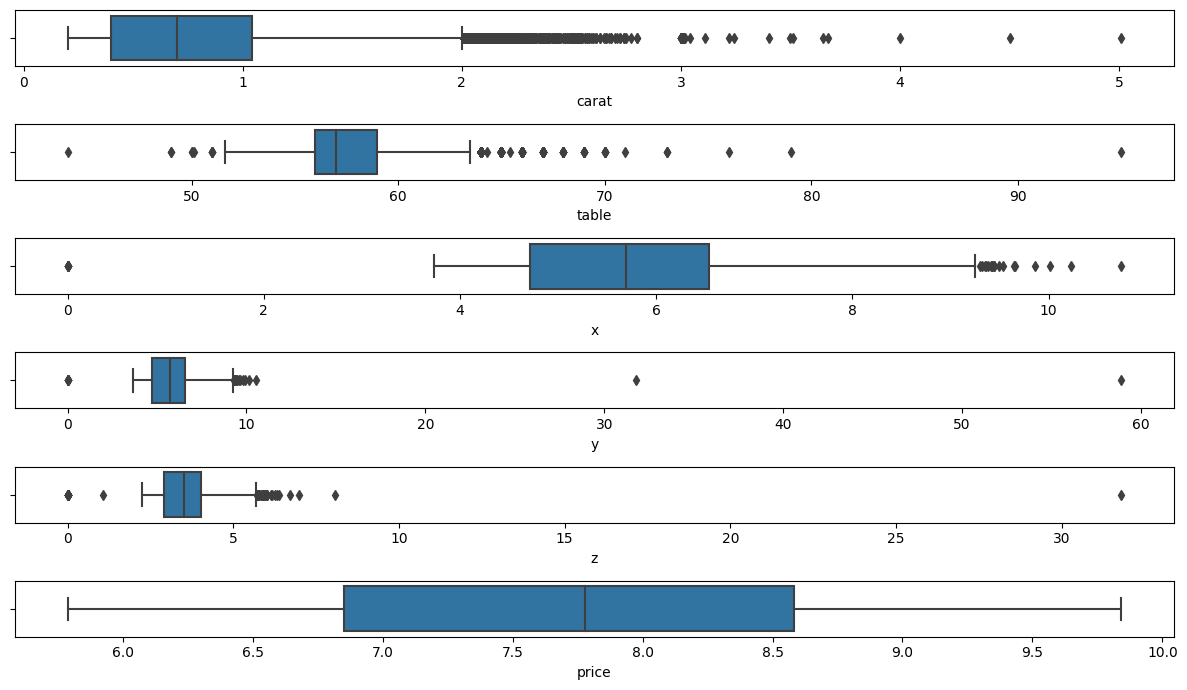

In [25]:
df_numericas=df.select_dtypes(include = np.number)
df_numericas=df_numericas.drop(["depth"],axis=1)


fig, ax = plt.subplots(6, 1, figsize=(12,7))

for i in range(len(df_numericas.columns)):
    sns.boxplot(x=df_numericas.columns[i], data=df_numericas, ax=ax[i])
plt.tight_layout()
plt.show();

In [27]:
def detectar_outliers(lista_columnas, dataframe): 
    
    dicc_indices = {} # creamos un diccionario donde almacenaremos índices de los outliers
    
    # iteramos por la lista de las columnas numéricas de nuestro dataframe
    for col in lista_columnas:
        
        #calculamos los cuartiles Q1 y Q3
        Q1 = np.nanpercentile(df[col], 25)
        Q3 = np.nanpercentile(df[col], 75)
        
        # calculamos el rango intercuartil
        IQR = Q3 - Q1
        
        # calculamos los límites
        outlier_step = 1.5 * IQR
        
        # filtramos nuestro dataframe para indentificar los outliers
        outliers_data = dataframe[(dataframe[col] < Q1 - outlier_step) | (dataframe[col] > Q3 + outlier_step)]
        
        
        if outliers_data.shape[0] > 0: # chequeamos si nuestro dataframe tiene alguna fila. 
        
            dicc_indices[col] = (list(outliers_data.index)) # si tiene fila es que hay outliers y por lo tanto lo añadimos a nuestro diccionario
        

    
    return dicc_indices 

In [30]:
columnas=df[["carat", "table","x","y","z"]]
outliers= detectar_outliers(columnas,df)
outliers

{'carat': [40,
  85,
  130,
  173,
  244,
  264,
  274,
  289,
  292,
  295,
  312,
  346,
  398,
  574,
  587,
  662,
  681,
  682,
  716,
  725,
  728,
  782,
  785,
  798,
  799,
  801,
  818,
  928,
  973,
  993,
  995,
  1011,
  1025,
  1026,
  1051,
  1154,
  1216,
  1249,
  1315,
  1388,
  1402,
  1417,
  1418,
  1423,
  1429,
  1433,
  1437,
  1443,
  1522,
  1660,
  1670,
  1739,
  1814,
  1816,
  1866,
  1885,
  1894,
  1967,
  1971,
  1977,
  1995,
  2030,
  2052,
  2063,
  2071,
  2178,
  2194,
  2224,
  2229,
  2238,
  2257,
  2289,
  2340,
  2346,
  2352,
  2357,
  2410,
  2440,
  2449,
  2460,
  2465,
  2468,
  2496,
  2518,
  2529,
  2530,
  2556,
  2570,
  2664,
  2683,
  2767,
  2785,
  2799,
  2811,
  2884,
  2912,
  2935,
  2939,
  2971,
  2981,
  3018,
  3032,
  3073,
  3123,
  3140,
  3146,
  3149,
  3156,
  3237,
  3297,
  3316,
  3348,
  3351,
  3369,
  3378,
  3381,
  3403,
  3430,
  3481,
  3488,
  3491,
  3502,
  3525,
  3545,
  3558,
  3580,
  3593,
  3606,


In [41]:
for ind,valor in df.iterrows():
    if valor["x"]==0:
        df.drop(ind,axis=0,inplace=True)
    elif valor["z"] ==0 or valor["z"]>30:
        df.drop(ind,axis=0,inplace=True)
    elif valor["y"]==0 or valor["y"]>30:
        df.drop(ind,axis=0,inplace=True)

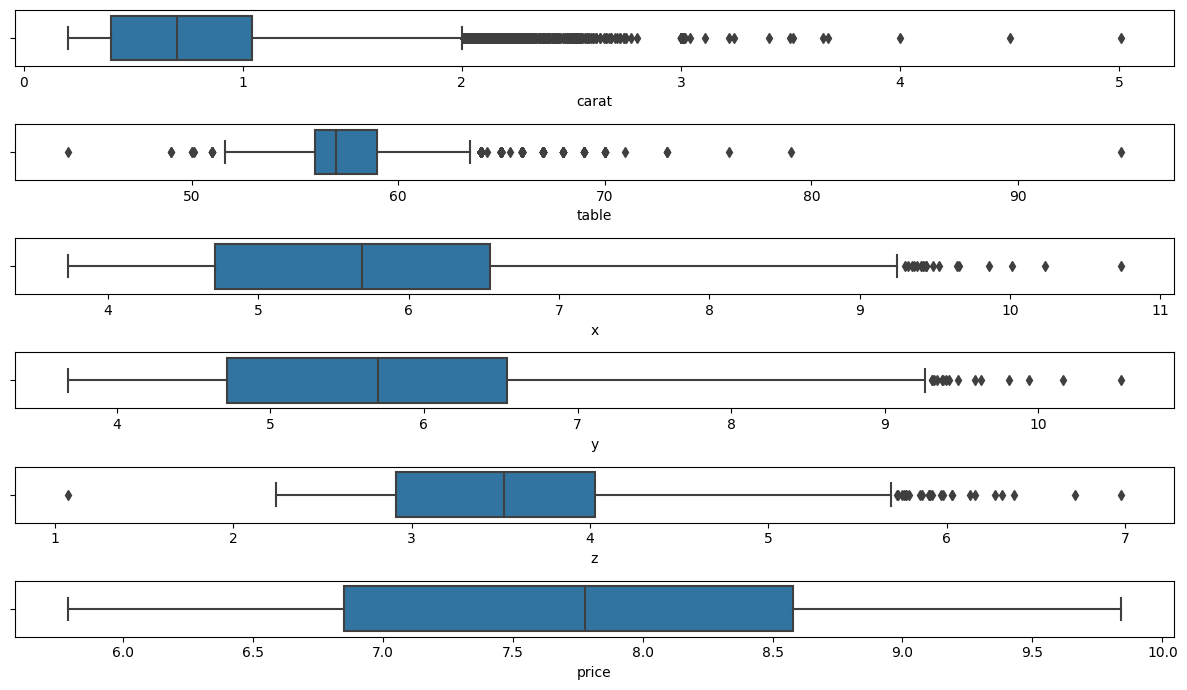

In [42]:
df_numericas=df.select_dtypes(include = np.number)
df_numericas=df_numericas.drop(["depth"],axis=1)


fig, ax = plt.subplots(6, 1, figsize=(12,7))        pickle.dump(grid, modelo)

for i in range(len(df_numericas.columns)):
    sns.boxplot(x=df_numericas.columns[i], data=df_numericas, ax=ax[i])
plt.tight_layout()
plt.show();

In [43]:
df.to_csv("datos/train_eda.csv")